# Code to reproduce key figures

> This code is extremely ugly, I'm sorry
>
> Even me myself cannot understand most of them
>
> Now only god knows what I wrote in the last few months
>
> I will try to make it prettier if I have time :(

/tmp/ipykernel_29334/817050695.py:20: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_29334/817050695.py:20: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/tmp/ipykernel_29334/817050695.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(


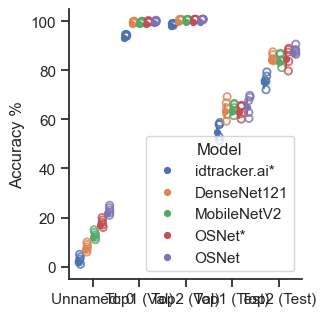

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('data_and_fig/reid_model.csv')

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set_theme(style='ticks')
plt.rcParams["font.family"] = "Arial"
f, ax = plt.subplots(figsize=(3, 3.5))
melted_df = pd.melt(df, id_vars=['Model'], var_name='Accuracy', value_name='%')
sns.stripplot(
    data=melted_df, x="Accuracy", y="%", hue="Model",
    legend=False,
    dodge=True, alpha=.8, zorder=1, size=10, facecolors='none', marker='$\circ$'
)
sns.pointplot(
    data=melted_df, x="Accuracy", y="%", hue="Model",
    join=False, dodge=.8 - .8 / 5, 
    markers="o", scale=.7, errwidth=1.5
)
# sns.move_legend(
#     ax, loc="lower left", ncol=1, frameon=True, handletextpad=0
# )
sns.despine()
plt.ylabel('Accuracy %')
plt.xlabel('')
plt.show()


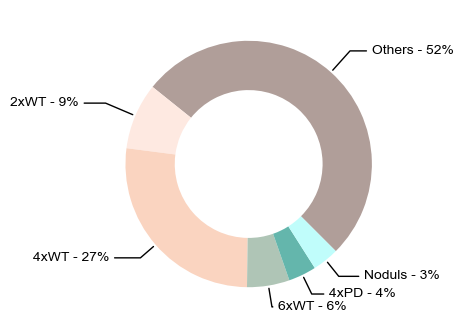

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

output = 50 + (574-471+1)
easy2mouse = 200
mice6 = 32
complex2mouse = 332-283+1
pd=21
behavexp=23
complexbehavexp=-377+1+450
noduls=20

# Data
labels = ['Output', 'Easy2Mouse', 'Mice6', 'Complex2Mouse', 'BehavExp', 'ComplexBehavExp', 'Noduls', 'PD']
sizes = [output, easy2mouse, mice6, complex2mouse, behavexp, complexbehavexp, noduls, pd]
labels = 'Others 2xWT 4xWT 6xWT 4xPD Noduls'.split()
sizes = [easy2mouse+behavexp+complexbehavexp, complex2mouse, output, mice6, pd, noduls]

fig, ax = plt.subplots(figsize=(5,4))
patches, *_ = ax.pie(
    x=sizes,
    colors='#B09E99 #FEE9E1 #FAD4C0 #AFC5B6 #64B6AC #C0FDFB'.split(),
    wedgeprops=dict(width=0.4),
    startangle=-45)

for i, wedge in enumerate(patches):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    label = "{} - {:1.0f}%".format(labels[i], sizes[i] / sum(sizes) * 100)
    ax.annotate(label, xy=(x, y), xytext=(1.5*x, 1.2*y),
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle),
                horizontalalignment=horizontalalignment)

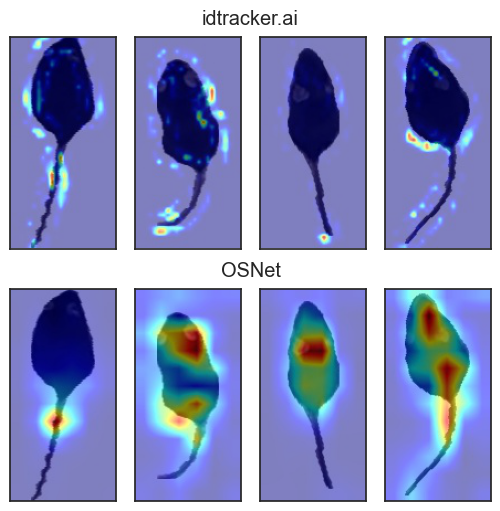

In [11]:
import matplotlib.pyplot as plt
import os
plt.rcParams["font.family"] = "Arial"
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
fig = plt.figure(constrained_layout=True, figsize=(5, 5))
subfigs = fig.subfigures(2, 1)
for i, model in enumerate(os.listdir('./data_and_fig/cams')):
  subfigs[i].suptitle(model)
  axes = subfigs[i].subplots(1, 4)
  files = sorted(os.listdir('./data_and_fig/cams/'+model))
  for j, img in enumerate(files):
    axes[j].imshow(plt.imread('./data_and_fig/cams/'+model+'/'+img))
    axes[j].get_xaxis().set_visible(False)
    axes[j].get_yaxis().set_visible(False)

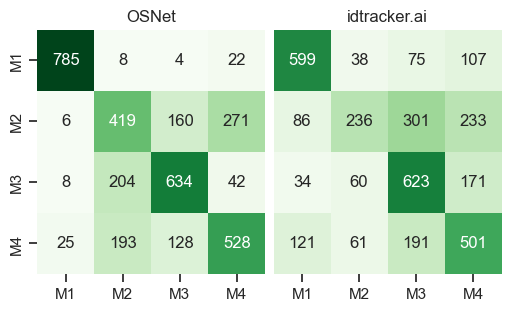

In [12]:
import pickle
with open('./data_and_fig/osnet_confusion_mat.pkl', 'rb') as f:
  mat = pickle.load(f)
with open('./data_and_fig/idcnn_confusion_mat.pkl', 'rb') as f:
  mat_idtrackerai = pickle.load(f)

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(5, 3), constrained_layout=True)
vmax = max(mat.max(), mat_idtrackerai.max())
sns.heatmap(mat, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[0], vmin=0, vmax=vmax)
sns.heatmap(mat_idtrackerai, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1], vmin=0, vmax=vmax)
axes[0].set_xticklabels(['M1', 'M2', 'M3', 'M4'])
axes[0].set_yticklabels(['M1', 'M2', 'M3', 'M4'])
axes[0].set_title('OSNet')
axes[1].set_title('idtracker.ai')
axes[1].set_xticklabels(['M1', 'M2', 'M3', 'M4'])
axes[1].set_yticks([])
plt.show()

/tmp/ipykernel_29334/3894131919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='%', data=df, ax=ax1, palette='crest')
/tmp/ipykernel_29334/3894131919.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(x='Method', y='%', data=df, ax=ax2, palette='crest')


([0, 1, 2],
 [Text(0, 0, 'idTracker.ai'), Text(1, 0, 'idTracker.ai*'), Text(2, 0, 'Ours')])

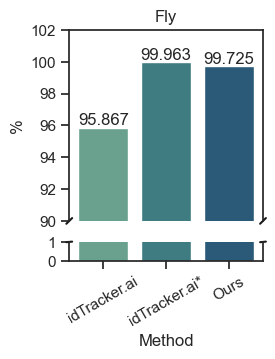

In [13]:
# 这个也要改一下

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

df = pd.read_csv('data_and_fig/idtracker_videos.csv')
df = df[df['Dataset'] == 'Fly'] # change to Ant for ant


df = pd.DataFrame({
  '%': [95.867, 99.963, 99.725], 
  'Method': ['idTracker.ai', 'idTracker.ai*', 'Ours'],
  })

gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1])

fig = plt.figure(figsize=(2.5, 3))

ax1 = plt.subplot(gs[0])
sns.barplot(x='Method', y='%', data=df, ax=ax1, palette='crest')
ax1.set_ylim(90, 102)
ax1.spines['bottom'].set_visible(False)
ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_title('Fly')

for item, label in enumerate(ax1.containers):
  lbl = label
  ax1.bar_label(label, fmt='{:.3f}')

ax2 = plt.subplot(gs[1])
barplot2 = sns.barplot(x='Method', y='%', data=df, ax=ax2, palette='crest')
ax2.set_ylim(0, 1)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('')

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
plt.xticks(rotation=30)

In [14]:
def plot_tsne(
  x,
  y,
  ax=None,
  title=None,
  draw_legend=True,
  return_centers=False,
  draw_cluster_labels=False,
  colors=None,
  legend_kwargs=None,
  label_order=None,
  rasterized=False,
  **kwargs
):
  import matplotlib
  import numpy as np

  if ax is None:
    _, ax = matplotlib.pyplot.subplots(figsize=(4, 4))

  if title is not None:
    ax.set_title(title)

  plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

  # Create main plot
  if label_order is not None:
    assert all(np.isin(np.unique(y), label_order))
    classes = [l for l in label_order if l in np.unique(y)]
  else:
    classes = np.unique(y)
  if colors is None:
    default_colors = matplotlib.rcParams["axes.prop_cycle"]
    colors = {k: v["color"] for k, v in zip(classes, default_colors())}

  point_colors = list(map(colors.get, y))

  ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=rasterized, **plot_params)

  # Plot mediods
  if return_centers:
    centers = []
    for yi in classes:
      mask = yi == y
      centers.append(np.median(x[mask, :2], axis=0))
    centers = np.array(centers)

      # Draw mediod labels
    if draw_cluster_labels:
      for idx, label in enumerate(classes):
        ax.text(
            centers[idx, 0],
            centers[idx, 1] + 2.2,
            label,
            fontsize=kwargs.get("fontsize", 6),
            horizontalalignment="center",
          )

  # Hide ticks and axis
  ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

  if draw_legend:
    legend_handles = [
      matplotlib.lines.Line2D(
          [],
          [],
          marker="s",
          color="w",
          markerfacecolor=colors[yi],
          ms=10,
          alpha=1,
          linewidth=0,
          label=yi,
          markeredgecolor="k",
      )
      for yi in classes
    ]
    legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
    if legend_kwargs is not None:
        legend_kwargs_.update(legend_kwargs)
    ax.legend(handles=legend_handles, **legend_kwargs_)
  if return_centers:
    centers = []
    for yi in classes:
      mask = yi == y
      centers.append(np.median(x[mask, :2], axis=0))
    centers = np.array(centers)
    return centers
  
def rgb_to_hex(r, g, b):
  return '#{:02x}{:02x}{:02x}'.format(r, g, b)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 24/24, 60.7 task/s, elapsed: 0s, ETA:     0s


/home/tc/anaconda3/envs/openmmlab/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tc/anaconda3/envs/openmmlab/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


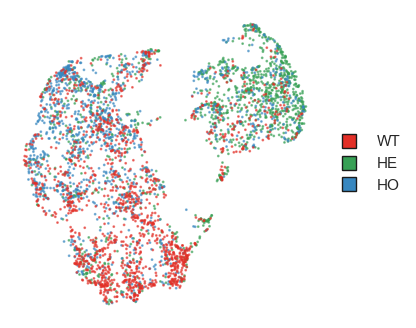

In [15]:
from mmengine.utils import track_iter_progress
import pickle
import numpy as np
with open('data_and_fig/2mice_stage3.pkl', 'rb') as f:
  keypoints_res_alone, keypoint_score_res_alone, score_res_alone, features = pickle.load(f)
videonames = ['cropped_4只WT-引入一只ASD-HE-1_cropped',
 'cropped_4只WT-引入一只ASD-HE-2',
 'cropped_4只WT-引入一只ASD-HE-3',
 'cropped_4只WT-引入一只ASD-HE-4',
 'cropped_4只WT-引入一只ASD-HE-5',
 'cropped_4只WT-引入一只ASD-HE-6',
 'cropped_4只WT-引入一只ASD-HE-7',
 'cropped_4只WT-引入一只ASD-HE-8',
 'cropped_4只WT-引入一只ASD-HO-1_cropped',
 'cropped_4只WT-引入一只ASD-HO-2',
 'cropped_4只WT-引入一只ASD-HO-3',
 'cropped_4只WT-引入一只ASD-HO-4',
 'cropped_4只WT-引入一只ASD-HO-5',
 'cropped_4只WT-引入一只ASD-HO-6',
 'cropped_4只WT-引入一只ASD-HO-7',
 'cropped_4只WT-引入一只ASD-HO-8',
 'cropped_4只WT-引入一只ASD-WT-1_cropped',
 'cropped_4只WT-引入一只ASD-WT-2',
 'cropped_4只WT-引入一只ASD-WT-3',
 'cropped_4只WT-引入一只ASD-WT-4',
 'cropped_4只WT-引入一只ASD-WT-5',
 'cropped_4只WT-引入一只ASD-WT-6',
 'cropped_4只WT-引入一只ASD-WT-7',
 'cropped_4只WT-引入一只ASD-WT-8']
mapper = np.array([1, 5, 2, 5, 5, 1, 4, 5, 1, 4, 4, 1, 3, 4, 5, 1, 3, 4, 4, 4, 5, -1, 2, 1])-1 # get the new comer ID
extracted_features = []
labels = []
selected_keypoints = []
transformed_keypoints = []
selected_scores = []
selected_keypoint_scores = []
vnames = []
shift = len(list(keypoints_res_alone.values())[0]) // 2
for video_idx, kwd in enumerate(track_iter_progress(videonames)):
  if '6' in kwd or '-5' in kwd: continue
  
  if '-WT-' in kwd:
    j = 0
  elif '-HE-' in kwd:
    j = 1
  elif '-HO-' in kwd:
    j = 2
  for idx in range(5):
    idx2 = mapper[video_idx]
    if idx == idx2: continue
    scores = np.array(score_res_alone[f'{kwd}-{idx}-{idx2}'][shift:])
    feats = np.array(features[f'{kwd}-{idx}-{idx2}'][shift:])
    keypoints = np.array(keypoints_res_alone[f'{kwd}-{idx}-{idx2}'][shift:])
    keypoint_scores = np.array(keypoint_score_res_alone[f'{kwd}-{idx}-{idx2}'][shift:])
    notnan_mask = ~np.isnan(scores).all(axis=1)
    scores = scores[notnan_mask]
    keypoints = keypoints[notnan_mask]
    keypoint_scores = keypoint_scores[notnan_mask]
    feats = feats[notnan_mask]
    for (s, k, ks, f) in zip(scores, keypoints, keypoint_scores, feats):
      k1 = k[0]
      k2 = k[1]
      mindist = np.linalg.norm(k1[:, 0] - k2[:, 0], axis=1).min()
      if mindist > 270 or np.isnan(mindist) or np.isnan(f).any(): continue # 删除所有距离过大的对象
      k_bak = k.copy()
      extracted_features.append(f)
      labels.append(j)
      selected_keypoints.append(k_bak)
      selected_scores.append(s)
      selected_keypoint_scores.append(ks)
      transformed_keypoints.append(k)
      vnames.append(kwd)

import umap
import umap.plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
palette = [sns.color_palette('Reds', 2)[1], sns.color_palette('Greens', 2)[1], sns.color_palette('Blues', 2)[1]]
palette = [(int(x[0]*255), int(x[1]*255), int(x[2]*255)) for x in palette]
palette = [rgb_to_hex(*x) for x in palette]
palette = {'WT': palette[0], 'HE': palette[1], 'HO': palette[2]}
data = np.array(extracted_features)
mapper_2d = umap.UMAP(n_neighbors=30, n_components=2, metric='cosine', random_state=1).fit(data)
df = pd.DataFrame(data=mapper_2d.embedding_, columns=['x', 'y'])
df['label'] = labels
df['label'] = df['label'].apply(lambda x: ['WT', 'HE', 'HO'][x])

plot_tsne(mapper_2d.embedding_, df['label'], colors=palette, label_order=['WT', 'HE', 'HO'])

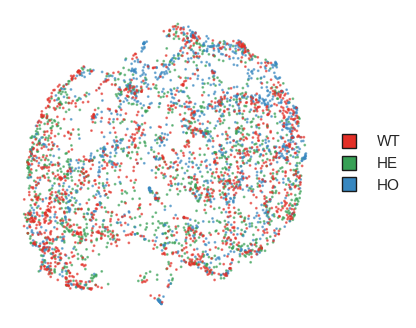

In [16]:
# 单纯使用关键点进行聚类
import numpy as np
raw_data = np.array(transformed_keypoints).reshape(len(transformed_keypoints), -1)
raw_mapper_2d = umap.UMAP(n_neighbors=30, n_components=2, metric='correlation', random_state=1).fit(raw_data)
raw_df = pd.DataFrame(data=raw_mapper_2d.embedding_, columns=['x', 'y'])
raw_df['label'] = labels
raw_df['label'] = raw_df['label'].apply(lambda x: ['WT', 'HE', 'HO'][x])
plot_tsne(raw_mapper_2d.embedding_, raw_df['label'], colors=palette, label_order=['WT', 'HE', 'HO'])

n clusters 2 silhouette score 0.54009736
For n_clusters = 2 The average silhouette_score is : 0.54009736
n clusters 3 silhouette score 0.5396321
For n_clusters = 3 The average silhouette_score is : 0.5396321
n clusters 4 silhouette score 0.4777534
For n_clusters = 4 The average silhouette_score is : 0.4777534
n clusters 5 silhouette score 0.46333325
For n_clusters = 5 The average silhouette_score is : 0.46333325
n clusters 6 silhouette score 0.38760576
n clusters 7 silhouette score 0.40175965
For n_clusters = 7 The average silhouette_score is : 0.40175965
n clusters 8 silhouette score 0.39366373
n clusters 9 silhouette score 0.40442145
For n_clusters = 9 The average silhouette_score is : 0.40442145
n clusters 10 silhouette score 0.38814852
n clusters 11 silhouette score 0.3811923
n clusters 12 silhouette score 0.37893534
n clusters 13 silhouette score 0.37819257
n clusters 14 silhouette score 0.38156462
n clusters 15 silhouette score 0.38459992
n clusters 16 silhouette score 0.38619828

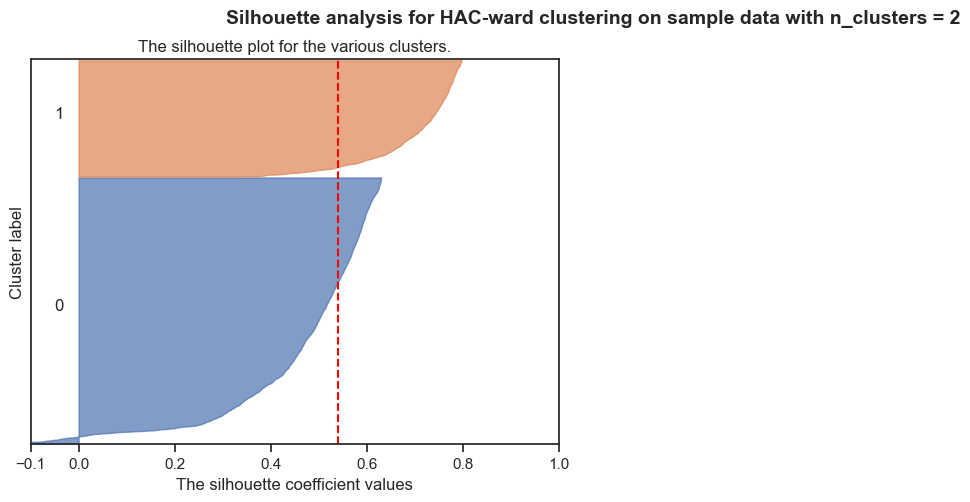

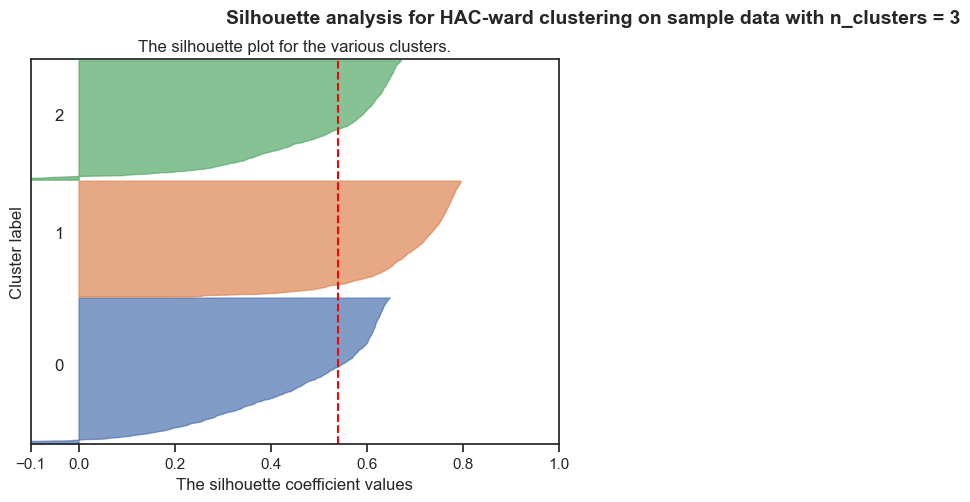

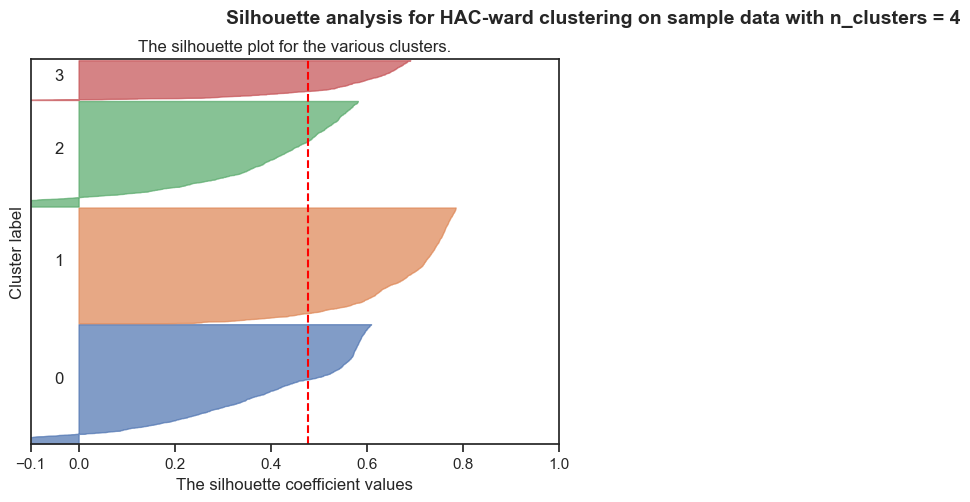

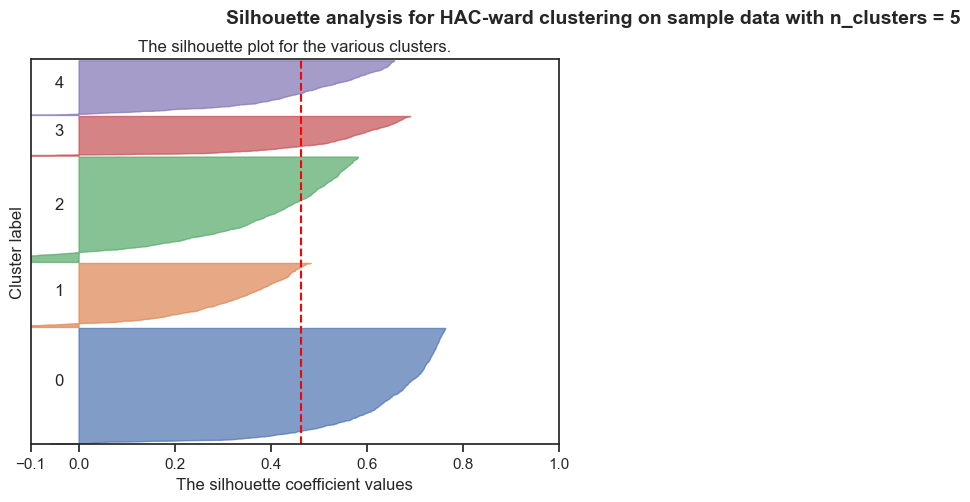

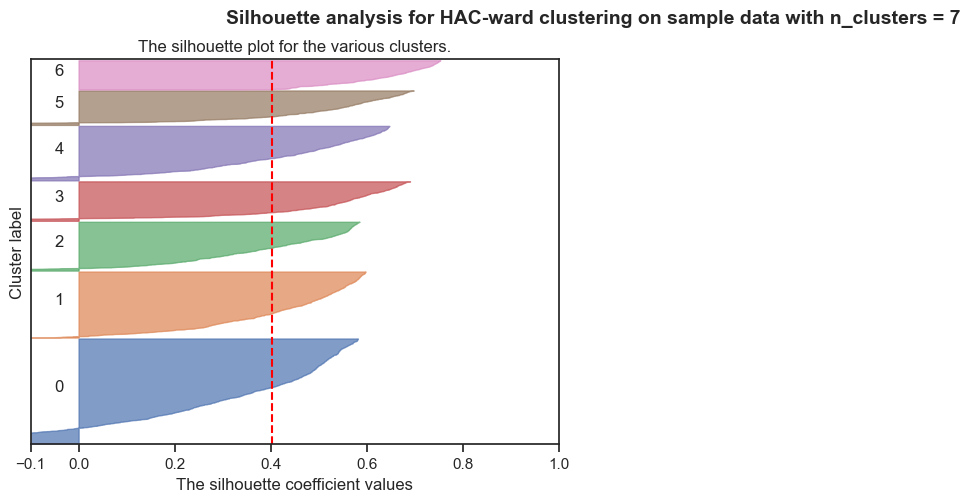

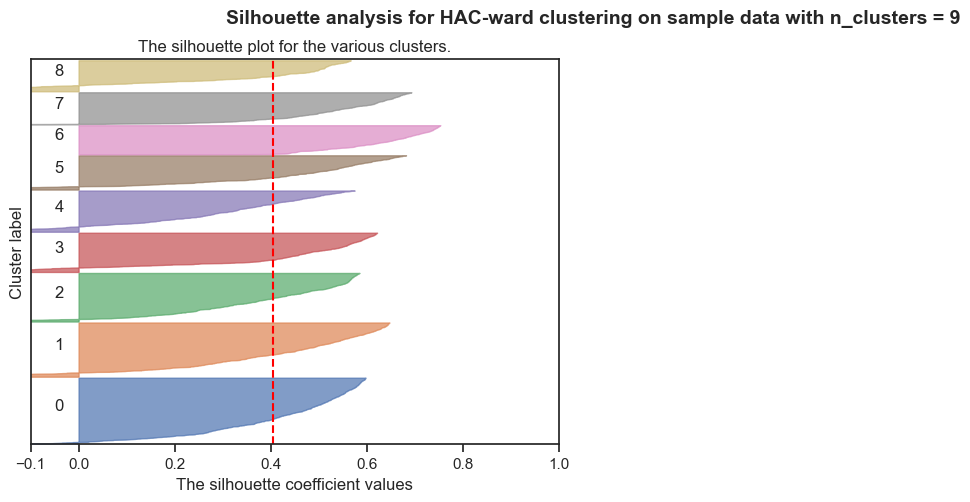

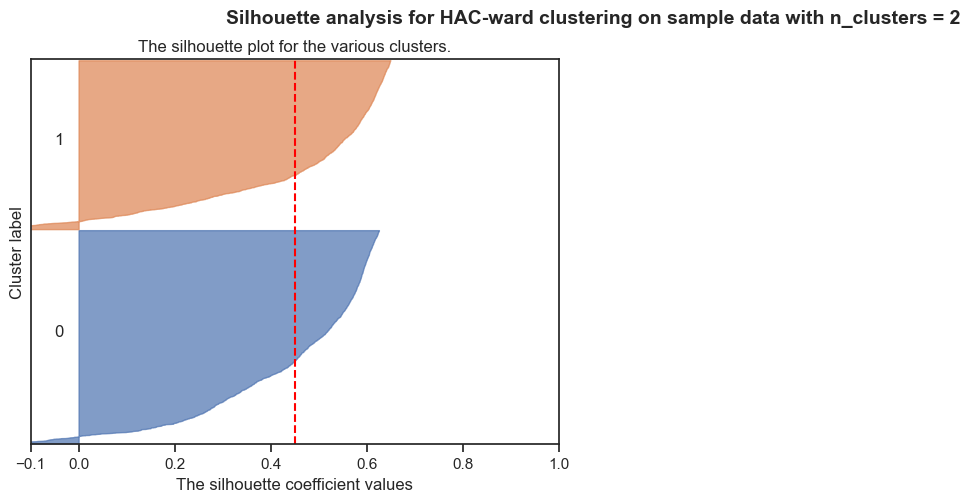

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib

def clustering(df1, prefix=''):
    X = df1.iloc[:].values
    range_n_clusters = range(2, 21)
    silhouette_values = {}
    calculated_values = []
    silhouette_threshold = .4
    for n_clusters in range_n_clusters:
        
        # Create a subplot with 1 row and 2 columns
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        y_predict = clusterer.fit_predict(X)
        cluster_labels = clusterer.labels_


        silhouette_avg = silhouette_score(X, cluster_labels)
        calculated_values.append(silhouette_avg)
        print('n clusters', n_clusters, 'silhouette score', silhouette_avg)
        if silhouette_avg > silhouette_threshold:
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)
            silhouette_values[n_clusters] = silhouette_avg
            # fig, (ax1, ax2) = plt.subplots(1, 2)
            fig = plt.figure(figsize=plt.figaspect(0.5))
            ax1 = fig.add_subplot(1, 2, 1)

            fig.set_size_inches(15, 5)

            ax1.set_xlim([-0.1, 1])
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
            default_colors = matplotlib.rcParams["axes.prop_cycle"]()
            for i in range(n_clusters):
                ith_cluster_silhouette_values = \
                    sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i
                color = next(default_colors)['color']
                ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            plt.suptitle(("Silhouette analysis for HAC-ward clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')
    if len(silhouette_values) == 0:
        print(f'No silhouette score > {silhouette_threshold}')
        return calculated_values
    optimal_nbr_clusters = max(silhouette_values, key=silhouette_values.get)
    print("Best Nbr of Clusters = %d, according to silhouette score: %.2f" % (optimal_nbr_clusters, silhouette_values[optimal_nbr_clusters]))

    return calculated_values
df1 = pd.DataFrame(data=mapper_2d.embedding_, columns=['x', 'y'])
weak_sup_silhouette = clustering(df1, prefix='weakly')
df2 = pd.DataFrame(data=raw_mapper_2d.embedding_, columns=['x', 'y'])
raw_silhouette = clustering(df2, prefix='raw')


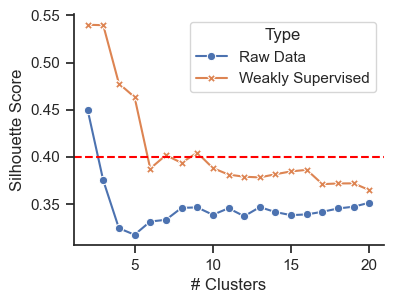

In [18]:
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
x = list(range(2, 2 + len(raw_silhouette)))
df = pd.DataFrame({'Raw Data': raw_silhouette, 'Weakly Supervised': weak_sup_silhouette, '# Clusters': x})
df_melted = pd.melt(df, id_vars=['# Clusters'], value_vars=['Raw Data', 'Weakly Supervised'], var_name='Type', value_name='Silhouette Score')
fig, ax = plt.subplots(figsize=(4, 3))
sns.lineplot(x='# Clusters', y='Silhouette Score', data=df_melted, style='Type', markers=True, dashes=False, hue='Type', ax=ax)
sns.despine()
ax.axhline(y=.4, linestyle='dashed', color='red')

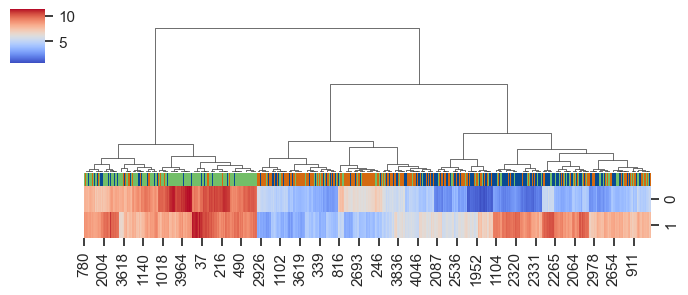

In [19]:
df = pd.DataFrame(data=mapper_2d.embedding_, columns=['x', 'y'])
df['label'] = labels
df['label'] = df['label'].apply(lambda x: ['WT', 'HE', 'HO'][x])

palette = {'WT': '#d46a10', 'HE': '#73be68', 'HO': '#084a92'}
colors = [palette[k] for k in df['label']]
sns.clustermap(mapper_2d.embedding_.T, method='ward', metric='euclidean', figsize=(7, 3), col_colors=colors, dendrogram_ratio=(.1, .7), colors_ratio=(0, 0.06), row_cluster=False, cmap='coolwarm')

array([[  0, 712],
       [  1, 588],
       [  2, 527],
       [  3, 426],
       [  4, 447],
       [  5, 372],
       [  6, 316],
       [  7, 347],
       [  8, 337]])

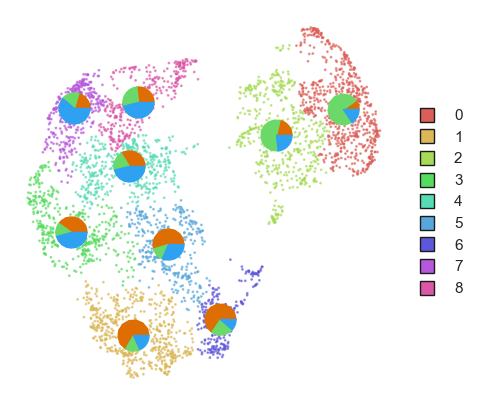

In [20]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

n_clusters = 9
ac = AgglomerativeClustering(n_clusters=n_clusters, compute_distances=True, linkage='ward').fit(mapper_2d.embedding_)
predicted_labels = ac.labels_
np.array(np.unique(predicted_labels, return_counts=True)).T
colors = sns.color_palette('hls', n_clusters)
colors = {k:v for k, v in enumerate(colors)}
fig, ax = plt.subplots(figsize=(5, 5))

def drawPieMarker(xs, ys, ratios, sizes, colors):
    assert sum(ratios) <= 1, 'sum of ratios needs to be < 1'

    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 10)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 10)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker)

centers = plot_tsne(mapper_2d.embedding_, predicted_labels, colors=colors, ax=ax, return_centers=True)
from collections import defaultdict
dist_dict = defaultdict(list)
for i in range(n_clusters):
  _, cnts = np.unique(np.array(labels)[predicted_labels == i], return_counts=True)
  total = sum(cnts)
  dist_dict['WT'].append(cnts[0] / total)
  dist_dict['HE'].append(cnts[1] / total)
  dist_dict['HO'].append(cnts[2] / total)
for i in range(n_clusters):
  center = centers[i]
  ratios = dist_dict['WT'][i], dist_dict['HE'][i], dist_dict['HO'][i]
  drawPieMarker([center[0]], [center[1]], ratios, [500], ['#de6d03', '#6ad96a', '#2fa1f1'])
np.array(np.unique(predicted_labels, return_counts=True)).T

/tmp/ipykernel_29334/1648812936.py:45: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=_df, x="Cluster", y="Count", hue="Genotype",


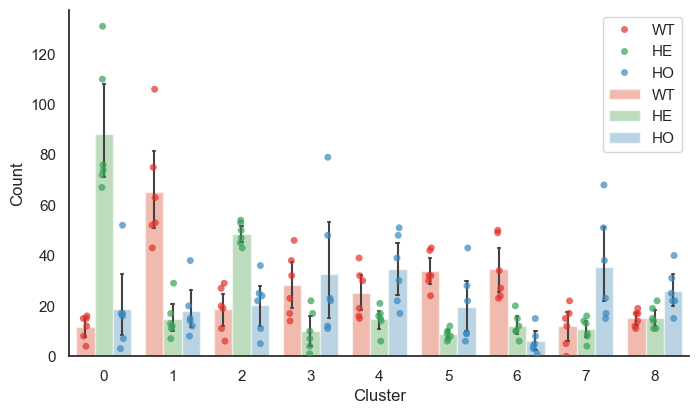

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

_d = {}
for item in set(vnames):
  if item.endswith('_cropped'): item = item[:-8]
  _d[item] = [0] * 9

for pl, vn in zip(predicted_labels, vnames):
  if vn.endswith('_cropped'): vn = vn[:-8]
  _d[vn][pl] += 1

from collections import defaultdict
df_dict = defaultdict(list)
for k, v in _d.items():
  if '-HE' in k: genotype = 'HE'
  elif '-HO' in k: genotype = 'HO'
  elif '-WT' in k: genotype = 'WT'
  idx = k[-1]
  for i in range(9):
    df_dict['Genotype'].append(genotype)
    df_dict['Individual'].append(idx)
    df_dict['Cluster'].append(i)
    df_dict['Count'].append(v[i])
_df = pd.DataFrame(df_dict)

palette1 = [sns.color_palette('Reds', 1)[0], sns.color_palette('Greens', 1)[0], sns.color_palette('Blues', 1)[0]]
palette2 = [sns.color_palette('Reds', 2)[-1], sns.color_palette('Greens', 2)[-1], sns.color_palette('Blues', 2)[-1]]

sns.set_theme(style="white")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Initialize the figure
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(top=True, right=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=_df, x="Cluster", y="Count", hue="Genotype",
    dodge=True, alpha=.7,  ax=ax, hue_order=['WT', 'HE', 'HO'], palette=palette2
)
sns.barplot(data=_df, x="Cluster", y="Count", hue="Genotype",
    alpha=.5, ax=ax, errwidth=1.5, palette=palette1, capsize=0.1, hue_order=['WT', 'HE', 'HO'])

from itertools import combinations
pairs=[]
for i in range(9):
  for comb in combinations('WT HE HO'.split(), 2):
    pairs.append(((i, comb[0]), (i, comb[1])))

ax.legend().set_title('')

In [22]:
from dataclasses import dataclass
@dataclass
class VideoInfo:
  width: int
  height: int

video = VideoInfo(1222, 1072)

import seaborn as sns
from collections.abc import Iterable
import matplotlib.pyplot as plt
SKELETON = [[0, 1], [0, 2], [0, 5], [5, 3], [5, 4], [5, 6], [6, 7]]
colors0 = [sns.color_palette('Reds', 3)[-1]] * 100
colors1 = [sns.color_palette('Greens', 3)[-1]] * 100
colors2 = [sns.color_palette('Blues', 3)[-1]] * 100
color_list = [colors0, colors1, colors2]
colors0 = [sns.color_palette('Reds', 3)[1]] * 100
colors1 = [sns.color_palette('Greens', 3)[1]] * 100
colors2 = [sns.color_palette('Blues', 3)[1]] * 100
color_list2 = [colors0, colors1, colors2]
def plot_skeleton(ax, kpts, colors, w, h):
  # kpts: (N, 8, 2)
  ax.set_xlim(0, w)
  ax.set_ylim(0, h)
  for i, (start, end) in enumerate(SKELETON):
    if start >= kpts.shape[1] or end >= kpts.shape[1]:
      continue
    x1s = kpts[:, start, 0]
    y1s = kpts[:, start, 1]
    x2s = kpts[:, end, 0]
    y2s = kpts[:, end, 1]
    for j, (x1, y1, x2, y2) in enumerate(zip(x1s, y1s, x2s, y2s)):
      if isinstance(colors[j], str):
        c = colors[j]
      elif isinstance(colors[j], Iterable):
        if colors[j][0] < 1:
          c = [int(item*255) for item in colors[j]]
          c = rgb_to_hex(*c)
        else:
          c = rgb_to_hex(*colors[j])
      if len(kpts) == 1:
        alpha = 1
      else:
        alpha = ((j+1)/len(x1s))*.6
      ax.plot((x1, x2), (y1, y2), c, alpha=alpha, linewidth=0.5)
      ax.scatter([x1, x2], [y1, y2], color=c, alpha=alpha, s=3.5)

import os
n_imgs = 5
to_be_ploted = []
predicted_labels = ac.labels_
for i in range(n_clusters):
  _scores = np.array(selected_scores).max(axis=1)[predicted_labels == i]
  _pred = np.array(selected_scores).argmax(axis=1)[predicted_labels == i]
  _labels = predicted_labels[predicted_labels == i]
  _keypoints = np.array(selected_keypoints)[predicted_labels == i]
  _original_labels = np.array(labels)[predicted_labels == i]
  _keypoint_scores = np.array(selected_keypoint_scores)[predicted_labels == i]

  topk_idx = np.argpartition(_scores, -n_imgs)[-n_imgs:]
  for idx in topk_idx:
    to_be_ploted.append((_keypoints[idx], _labels[idx], _original_labels[idx], _scores[idx], _pred[idx], _keypoint_scores[idx]))
score_thresh = np.mean(selected_scores) + np.std(selected_scores) * 2
print('score threshold', score_thresh)

score threshold 0.5806259661912918


In [23]:
from layercam import LayerCAM
from pytorch_grad_cam.activations_and_gradients import ActivationsAndGradients
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

from mmaction.apis import init_recognizer
import mmengine

checkpoint = f'./data_and_fig/2mice.pth'
config = f'./data_and_fig/2mice_config.py'

cfg = mmengine.Config.fromfile(config)
model = init_recognizer(cfg, checkpoint, 'cpu')

import torch.nn as nn

seq_model = nn.Sequential(*[model.backbone, model.cls_head])
seq_model.eval()

import pickle
with open('data_and_fig/2mice_stage3.pkl', 'rb') as f:
  keypoints_res_alone, keypoint_score_res_alone, score_res_alone, features = pickle.load(f)


Loads checkpoint by local backend from path: ./data_and_fig/2mice.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: cls_head.data_bn.weight, cls_head.data_bn.bias, cls_head.data_bn.running_mean, cls_head.data_bn.running_var, cls_head.data_bn.num_batches_tracked, cls_head.gcn.0.gcn.A, cls_head.gcn.0.gcn.bn.weight, cls_head.gcn.0.gcn.bn.bias, cls_head.gcn.0.gcn.bn.running_mean, cls_head.gcn.0.gcn.bn.running_var, cls_head.gcn.0.gcn.bn.num_batches_tracked, cls_head.gcn.0.gcn.conv.weight, cls_head.gcn.0.gcn.conv.bias, cls_head.gcn.0.gcn.down.0.weight, cls_head.gcn.0.gcn.down.0.bias, cls_head.gcn.0.gcn.down.1.weight, cls_head.gcn.0.gcn.down.1.bias, cls_head.gcn.0.gcn.down.1.running_mean, cls_head.gcn.0.gcn.down.1.running_var, cls_head.gcn.0.gcn.down.1.num_batches_tracked, cls_head.gcn.0.tcn.conv.weight, cls_head.gcn.0.tcn.conv.bias, cls_head.gcn.0.tcn.bn.weight, cls_head.gcn.0.tcn.bn.bias, cls_head.gcn.0.tcn.bn.running_mean, cls_head.gcn.0.tcn.bn.

In [24]:
def gen_fake_anno(kpts, kpts_scores, h, w):
  fake_anno = dict(
    frame_dir='',
    label=-1,
    img_shape=(h, w),
    original_shape=(h, w),
    start_index=0,
    modality='Pose',
    total_frames=kpts.shape[1])
  fake_anno['keypoint'] = kpts.copy()
  fake_anno['keypoint_score'] = kpts_scores.copy()
  return fake_anno

def extract_feat(model, kpts, score, w, h):
  from mmengine.dataset import Compose, pseudo_collate

  cfg = model.cfg
  test_pipeline_cfg = cfg.test_pipeline
  test_pipeline = Compose(test_pipeline_cfg)

  if isinstance(kpts, list):
    data = []
    for k, s in zip(kpts, score):
      fake_anno = gen_fake_anno(k, s, h, w)
      data.append(test_pipeline(fake_anno))
  else:
    fake_anno = gen_fake_anno(kpts, score, h, w)
    data = [test_pipeline(fake_anno)]
  data = pseudo_collate(data)
  import torch
  with torch.no_grad():
    processed_data = model.data_preprocessor(data, False)
    res = model(processed_data['inputs'], processed_data['data_samples'], mode='predict')
  return res

from mmengine.dataset import pseudo_collate

def points_to_gaussian_heatmap(centers, height, width, scales):
    gaussians = []
    new_scales = []
    for (y,x), s in zip(centers, scales):
        if s <= 0 or y <= 0: continue
        c = np.eye(2)*s
        g = multivariate_normal(mean=(x,y), cov=c)
        gaussians.append(g)
        new_scales.append(s)

    # create a grid of (x,y) coordinates at which to evaluate the kernels
    x = np.arange(0, width)
    y = np.arange(0, height)
    xx, yy = np.meshgrid(x,y)
    xxyy = np.stack([xx.ravel(), yy.ravel()]).T
    
    # evaluate kernels at grid points
    zz = np.zeros(height*width)
    for g, s in zip(gaussians, new_scales):
        new = g.pdf(xxyy)*(s**2) # for better visualization
        zz = np.where(zz > new, zz, new)

    img = zz.reshape((height,width))
    return img

predicted_mapper = [0, 2, 1] # sorry for this inconsistency :( the labels are WT HO HE when training but become WT HE HO in the paper

target_layers = [seq_model[0].gcn[5]]
from matplotlib_scalebar.scalebar import ScaleBar
from scipy.stats import multivariate_normal
from scipy.signal import resample
from captum.attr import Saliency
saliency = Saliency(seq_model)

for i, (kpts, lbl, original_lbl, s, p, ks) in enumerate(to_be_ploted):
  res = extract_feat(model, kpts, ks, video.width, video.height)
  predicted_lbl = res[0].pred_labels.item[0].item()
  fake_anno = gen_fake_anno(kpts, ks, video.width, video.height)
  k1s = kpts[0]
  k2s = kpts[1]

  from mmcv.transforms import Compose
  transforms = Compose(cfg.test_dataloader.dataset.pipeline)
  data = transforms(fake_anno)
  data = pseudo_collate([data])
  data = model.data_preprocessor(data, False)
  
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
  scalebar = ScaleBar(dx=40/1042, units= "cm")
  ax.add_artist(scalebar)
  ax.set_xticks([])
  ax.set_yticks([])
  plot_skeleton(ax, k1s, color_list[0], video.width, video.height)
  plot_skeleton(ax, k2s, color_list2[original_lbl], video.width, video.height)
  plt.savefig(f'data_and_fig/{lbl}-{original_lbl}-{predicted_mapper[predicted_lbl]}-{i}-{round(100*s)}.pdf', format='pdf', bbox_inches='tight')
  plt.close()
  targets = [ClassifierOutputTarget(predicted_lbl)]
  cam = LayerCAM(seq_model, target_layers, use_cuda=False)
  cam.activations_and_grads.release()
  reshape_transform = None
  cam.activations_and_grads = ActivationsAndGradients(
          cam.model, cam.target_layers, reshape_transform)
  grayscale_cam = cam(
          data['inputs'][0],
          None,
          eigen_smooth=True,
          aug_smooth=True)
  grayscale_cam = resample(grayscale_cam, num=50, axis=1)
  _k = np.stack([k1s, k2s])
  _x = _k[..., 0].ravel() / 4
  _y = _k[..., 1].ravel() / 4
  _z = grayscale_cam.ravel()
  hmap = points_to_gaussian_heatmap(list(zip(_y, _x)), video.height // 4, video.width // 4, _z * 10)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim([0, video.width / 4])
  ax.set_ylim([0, video.height / 4])
  ax.axis('off')
  ax.imshow(hmap, alpha=1, cmap=sns.color_palette('Spectral_r', as_cmap=True))
  plt.savefig(f'data_and_fig/{lbl}-{original_lbl}-{predicted_mapper[predicted_lbl]}-{i}-{round(100*s)}-layercam.png', bbox_inches='tight')
  plt.close()
  attribution = saliency.attribute(data['inputs'][0], target=predicted_lbl)
  _z = attribution[0].mean(axis=-1).cpu().numpy().ravel()
  hmap = points_to_gaussian_heatmap(list(zip(_y, _x)), video.height // 4, video.width // 4, _z * 40)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim([0, video.width / 4])
  ax.set_ylim([0, video.height / 4])
  ax.axis('off')
  ax.imshow(hmap, alpha=1, cmap=sns.color_palette('Spectral_r', as_cmap=True))
  plt.savefig(f'data_and_fig/{lbl}-{original_lbl}-{predicted_mapper[predicted_lbl]}-{i}-{round(100*s)}-saliency.png', bbox_inches='tight')
  plt.close()
  assert 1==2


width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8


/home/tc/anaconda3/envs/openmmlab/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


AssertionError: 

In [25]:
import seaborn as sns
colors0 = [sns.color_palette('Reds', 3)[-1]] * 100
colors1 = [sns.color_palette('Greens', 3)[-1]] * 100
colors2 = [sns.color_palette('Blues', 3)[-1]] * 100
color_list = [colors0, colors1, colors2]
reds = []
for i in range(4):
  reds.append([sns.color_palette('Reds', 4)[i]] * 100)

colors0 = [sns.color_palette('Reds', 3)[1]] * 100
colors1 = [sns.color_palette('Greens', 3)[1]] * 100
colors2 = [sns.color_palette('Blues', 3)[1]] * 100
color_list2 = [colors0, colors1, colors2]

In [33]:
import pickle
with open('data_and_fig/5mice_rawdata.pkl', 'rb') as f:
  data = pickle.load(f)
keypoint_chunks = []
keypoint_score_chunks = []
labels = []
targets = []
for item in data['annotations']:
  keypoint_chunks.append(np.array(item['keypoint']))
  keypoint_score_chunks.append(np.array(item['keypoint_score']))
  labels.append(item['label'])
  targets.append(item['target'])

In [34]:
import random
random.seed(42)
to_be_ploted = []

crt = 0
total = 0
for kpts, kpts_s, t, s, lbl in zip(keypoint_chunks, keypoint_score_chunks, targets, scores, labels):
  if np.max(s) > 0.5: total += 1
  else: continue
  if lbl == 1: lbl = 2
  elif lbl == 2: lbl = 1
  
  if np.argmax(s) == lbl and lbl > 0:
    to_be_ploted.append((kpts, lbl, t, max(s), kpts_s))
    crt += 1
to_be_ploted = random.sample(to_be_ploted, 30)
to_be_ploted_backup = to_be_ploted.copy()
crt / total, crt

(0.5132743362831859, 464)

In [35]:
import mmengine
from mmaction.apis import init_recognizer

config = f'./data_and_fig/5mice_config.py'
checkpoint = f'./data_and_fig/5mice.pth'

cfg = mmengine.Config.fromfile(config)
model = init_recognizer(cfg, checkpoint, 'cpu')
model.eval()
import torch.nn as nn

seq_model = nn.Sequential(*[model.backbone, model.cls_head])
seq_model.eval()

with open('data_and_fig/5mice_stage3.pkl', 'rb') as f:
  keypoints_res_alone, keypoint_score_res_alone, scores, features = pickle.load(f)


Loads checkpoint by local backend from path: ./data_and_fig/5mice.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: cls_head.data_bn.weight, cls_head.data_bn.bias, cls_head.data_bn.running_mean, cls_head.data_bn.running_var, cls_head.data_bn.num_batches_tracked, cls_head.gcn.0.gcn.A, cls_head.gcn.0.gcn.bn.weight, cls_head.gcn.0.gcn.bn.bias, cls_head.gcn.0.gcn.bn.running_mean, cls_head.gcn.0.gcn.bn.running_var, cls_head.gcn.0.gcn.bn.num_batches_tracked, cls_head.gcn.0.gcn.conv.weight, cls_head.gcn.0.gcn.conv.bias, cls_head.gcn.0.gcn.down.0.weight, cls_head.gcn.0.gcn.down.0.bias, cls_head.gcn.0.gcn.down.1.weight, cls_head.gcn.0.gcn.down.1.bias, cls_head.gcn.0.gcn.down.1.running_mean, cls_head.gcn.0.gcn.down.1.running_var, cls_head.gcn.0.gcn.down.1.num_batches_tracked, cls_head.gcn.0.tcn.conv.weight, cls_head.gcn.0.tcn.conv.bias, cls_head.gcn.0.tcn.bn.weight, cls_head.gcn.0.tcn.bn.bias, cls_head.gcn.0.tcn.bn.running_mean, cls_head.gcn.0.tcn.bn.

In [36]:
from typing import Iterable

def plot_skeleton(ax, kpts, colors, w, h):
  # kpts: (N, 8, 2)
  ax.set_xlim(0, w)
  ax.set_ylim(0, h)
  print(kpts.shape)
  for i, (start, end) in enumerate(SKELETON):
    if start >= kpts.shape[1] or end >= kpts.shape[1]:
      continue
    x1s = kpts[:, start, 0]
    y1s = kpts[:, start, 1]
    x2s = kpts[:, end, 0]
    y2s = kpts[:, end, 1]
    for j, (x1, y1, x2, y2) in enumerate(zip(x1s, y1s, x2s, y2s)):
      if isinstance(colors[j], str):
        c = colors[j]
      elif isinstance(colors[j], Iterable):
        if colors[j][0] < 1:
          c = [int(item*255) for item in colors[j]]
          c = rgb_to_hex(*c)
        else:
          c = rgb_to_hex(*colors[j])
      if len(kpts) == 1:
        alpha = 1
      else:
        alpha = ((j+1)/len(x1s))*.6
      ax.plot((x1, x2), (y1, y2), c, alpha=alpha, linewidth=0.5)
      ax.scatter([x1, x2], [y1, y2], color=c, alpha=alpha, s=3.5)

def gen_fake_anno(kpts, kpts_scores, h, w):
  fake_anno = dict(
    frame_dir='',
    label=-1,
    img_shape=(h, w),
    original_shape=(h, w),
    start_index=0,
    modality='Pose',
    total_frames=kpts.shape[1])
  fake_anno['keypoint'] = kpts.copy()
  fake_anno['keypoint_score'] = kpts_scores.copy()
  return fake_anno

from mmaction.apis import init_recognizer
from mmengine.dataset import pseudo_collate

predicted_mapper = [0, 2, 1]

target_layers = [seq_model[0].gcn[5]]
from matplotlib_scalebar.scalebar import ScaleBar
from scipy.signal import resample
from captum.attr import Saliency
from layercam import LayerCAM
from pytorch_grad_cam.activations_and_gradients import ActivationsAndGradients
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
saliency = Saliency(seq_model)

for i, (kpts, lbl, t, s, ks) in enumerate(to_be_ploted[10:]):
  res = extract_feat(model, kpts, ks, video.width, video.height)
  if lbl == 0: predicted_lbl = 0
  elif lbl == 1: predicted_lbl = 2
  elif lbl == 2: predicted_lbl = 1
  fake_anno = gen_fake_anno(kpts, ks, video.width, video.height)


  from mmcv.transforms import Compose
  transforms = Compose(cfg.test_dataloader.dataset.pipeline)
  data = transforms(fake_anno)
  data = pseudo_collate([data])
  data = model.data_preprocessor(data, False)
  
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
  scalebar = ScaleBar(dx=40/1042, units= "cm")
  ax.add_artist(scalebar)
  ax.set_xticks([])
  ax.set_yticks([])
  for _i in range(5):
    if _i == t: c = color_list[lbl]
    else: c = reds[_i] if _i < 4 else reds[_i - 1]
    plot_skeleton(ax, kpts[_i], c, video.width, video.height)

  plt.savefig(f'data_and_fig/5mice_{lbl}-{round(100*s)}-{i}.pdf', format='pdf', bbox_inches='tight')
  plt.close()
  targets = [ClassifierOutputTarget(predicted_lbl)]
  cam = LayerCAM(seq_model, target_layers, use_cuda=False)
  cam.activations_and_grads.release()
  reshape_transform = None
  cam.activations_and_grads = ActivationsAndGradients(
          cam.model, cam.target_layers, reshape_transform)
  grayscale_cam = cam(
          data['inputs'][0],
          None,
          eigen_smooth=True,
          aug_smooth=True)
  grayscale_cam = resample(grayscale_cam, num=50, axis=1)

  _x = kpts[..., 0].ravel() / 4
  _y = kpts[..., 1].ravel() / 4
  _z = grayscale_cam.ravel()
  hmap = points_to_gaussian_heatmap(list(zip(_y, _x)), video.height // 4, video.width // 4, _z * 10)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim([0, video.width / 4])
  ax.set_ylim([0, video.height / 4])
  ax.axis('off')
  ax.imshow(hmap, alpha=1, cmap=sns.color_palette('Spectral_r', as_cmap=True))
  plt.savefig(f'data_and_fig/5mice_{lbl}-{round(100*s)}-{i}-layercam.png', bbox_inches='tight')
  plt.close()
  attribution = saliency.attribute(data['inputs'][0], target=predicted_lbl)
  _z = attribution[0].mean(axis=-1).cpu().numpy().ravel()
  hmap = points_to_gaussian_heatmap(list(zip(_y, _x)), video.height // 4, video.width // 4, _z * 40)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.set_xlim([0, video.width / 4])
  ax.set_ylim([0, video.height / 4])
  ax.axis('off')
  ax.imshow(hmap, alpha=1, cmap=sns.color_palette('Spectral_r', as_cmap=True))
  plt.savefig(f'data_and_fig/5mice_{lbl}-{round(100*s)}-{i}-saliency.png', bbox_inches='tight')
  plt.close()
  assert 1==2

(62, 8, 2)
(62, 8, 2)
(62, 8, 2)
(62, 8, 2)
(62, 8, 2)
width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8
width 12 height 8


/home/tc/anaconda3/envs/openmmlab/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


AssertionError: 